In [1]:
#Import Dependencies
#from config import City_weather_api_key
from citipy import citipy

import requests as req
import random
import requests
import csv

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib

In [2]:
# Getting a sample that is representative of the world cities.

# Set Lat & Lon Zones to randomly pick coordinates - So, we have some from each region.
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)


# Creating a new data frame to hold randomly picked coordinates and corresponding city information
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.shape

(16200, 2)

In [3]:
cities_df.head()

,Latitude,Longitude
0,-177.00,-392.15
1,-175.33,-389.52
2,-177.64,-395.37
3,-175.29,-387.02
4,-178.84,-387.34


In [4]:
# For the selected coordinates, use citipy to associate them with nearest city.
cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""


for index,row in cities_df.iterrows():
    city_n = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city_n.city_name)
    cities_df.set_value(index,"Closest Country code",city_n.country_code)

    # Dropping random lat and lon samples from dataframe as they are not the exact coordinates for the cities.

clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Dropping duplicate cities which may have resulted in the previous step
clean_cities_df = clean_cities_df.drop_duplicates()

clean_cities_df.shape


(884, 2)

In [5]:
clean_cities_df.head()

,Closest City name,Closest Country code
0,vaini,to
355,mataura,pf
400,punta arenas,cl
401,ushuaia,ar
700,bredasdorp,za


In [6]:
# Picking a sample of 500 cities to proceed with analysis
selected_cities = clean_cities_df.sample(500)
selected_cities = selected_cities.reset_index(drop=True)

In [7]:
selected_cities.head()

,Closest City name,Closest Country code
0,miranda,br
1,pirapo,py
2,zatoka,ua
3,bargal,so
4,hambantota,lk


In [8]:
# Save config information.
#api_key = "3f1f5f418e58028aa38ca108fb027e36"
with open('C:\\Users\\pkodak\\Desktop\\Myproject-Python\\config.json') as data_file:    
    data = json.load(data_file)
api_key=data ['citi_api_key']
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [9]:
city_weather_resp = []
cities =selected_cities['Closest City name']

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    city_weather_resp.append(response)

city_weather_resp


[{'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 3.25, 'lon': -76.23},
  'dt': 1513890000,
  'id': 3674702,
  'main': {'humidity': 48,
   'pressure': 1010,
   'temp': 31,
   'temp_max': 31,
   'temp_min': 31},
  'name': 'Miranda',
  'sys': {'country': 'CO',
   'id': 4251,
   'message': 0.1649,
   'sunrise': 1513854332,
   'sunset': 1513897307,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
    'icon': '03d',
    'id': 802,
    'main': 'Clouds'}],
  'wind': {'deg': 330, 'speed': 6.7}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -26.85, 'lon': -55.53},
  'dt': 1513890000,
  'id': 3437514,
  'main': {'humidity': 49,
   'pressure': 1005,
   'temp': 32,
   'temp_max': 32,
   'temp_min': 32},
  'name': 'Pirapo',
  'sys': {'country': 'PY',
   'id': 4610,
   'message': 0.0048,
   'sunrise': 1513845948,
   'sunset': 1513895751,
   'type': 1},
  'visibility': 10000,
  'weather': [{'descri

In [10]:
lat = []
temp = []
humidilty=[]
Cloudiness=[]
windspeed=[]

for data in city_weather_resp:
    try:
        lat.append(data.get("coord").get("lat"))
        temp.append(data.get("main").get("temp"))
        humidilty.append(data.get("main").get("humidity")) 
        Cloudiness.append(data.get("clouds").get("all"))
        windspeed.append(data.get("wind").get("speed"))
    except:
        continue
print(lat)
print(temp)

weather_data = { "lat": lat ,"temp": temp,"humidilty": humidilty,"Cloudiness": Cloudiness,"windspeed": windspeed}
weather_data = pd.DataFrame(weather_data)
weather_data.head()


[3.25, -26.85, 46.07, 6.12, 8.93, 63.84, 40.59, 41.84, 40.04, 61.87, 61.47, -30.32, 36.82, 4.74, 36.37, 64.86, -20.33, 63.76, -33.93, 8.2, 42.13, 1.31, 9.49, 70.86, 38.67, 4.92, 63.05, 64.38, -28.52, 32.22, 70.63, 32.77, -28.77, 4.95, 42.98, 60.73, -33.01, -19.39, -45.87, -6.88, 42.65, 51.59, -34.48, -10.62, -16.48, 63.19, 44.02, 42.47, 19.73, 42.1, 42.52, -14.78, 41.89, 2.67, 40.28, 6.88, 36.57, -21.34, 1.24, 66.15, -16.52, -3.8, 48.43, -29.95, 5.97, 22.89, 31.03, -24.42, 62.33, 38.58, 44.17, 20.89, -16.12, 40.83, -25.86, 7.45, 30.76, 7.43, 69.3, 37.77, 66.08, 37.3, 7.42, 65.11, 36.21, 14.28, -46.6, 34.74, 64.84, 71, 6.8, 61.67, 40.78, 37.72, 1.33, 36.62, 59.78, 60.63, 38.65, 4.48, -28.34, 48.04, 40.13, 9.53, 38.72, -17.34, -22.47, -0.41, 63.9, -3.28, -2.23, 44.38, 4.75, 12.35, 55.46, 42.3, 48.85, 12.25, -18.59, 40.8, 4.77, -29.66, 69.41, 43.58, 73.51, 4.92, 6.8, 9.94, -54.8, 31.12, -33.92, -15.38, 46.68, 59.43, 37.67, 41.08, -18.65, 41.12, -22.96, 44.08, 70.03, 39.51, -34.42, 60.4, -

,Cloudiness,humidilty,lat,temp,windspeed
0,40,48,3.25,31.00,6.70
1,40,49,-26.85,32.00,2.60
2,5,85,46.07,-4.00,3.68
3,56,100,6.12,25.62,6.08
4,0,70,8.93,21.74,0.98


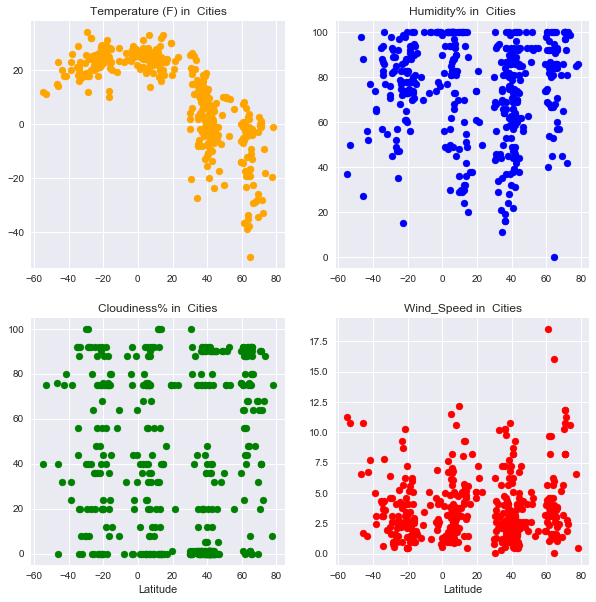

In [11]:
#Get subplot to plot the scatter graphs for 
#tempature,humidity,cloudiness,temp for latitude
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
#selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
# Cut the window with 2 rows and 2 columns:
plt.subplot(221)
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o",color="orange")
plt.title("Temperature (F) in  Cities")

#plt.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
plt.subplot(222)
plt.scatter(weather_data["lat"], weather_data["humidilty"], marker="o",color="blue")
plt.title("Humidity% in  Cities")

plt.subplot(223)
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o",color="green")
plt.title("Cloudiness% in  Cities")
plt.xlabel("Latitude")

plt.subplot(224)
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o",color="red")
plt.title("Wind_Speed in  Cities")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("ScatterPlot for latitude.png")

plt.show()

#Obeservation

1.Temperature is at it's peak around equator. This clearly shows that temperature increases as it approaches equator

2.Humidity around Equator seems to be in the range on 25 - 100, which is pretty similar to parts far from Equator

3.Wind speed for most cities seem to fall under 10 mph. This is not different around equator
